In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn

tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 10,
    "font.size": 10,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
    }
plt.rcParams.update(tex_fonts)

In [18]:
df_rreg_results = pd.read_csv('../prediction_results/robust_regression.csv')
df_rreg_results['date'] = pd.to_datetime(df_rreg_results['date'], format = '%Y-%m-%d %H:%M') # 
df_rreg_results.set_index('date', inplace=True) # date column as index

df_dense_results = pd.read_csv('../prediction_results/dense_12_predictions.csv')
df_dense_results['date'] = pd.to_datetime(df_dense_results['date'], format = '%Y-%m-%d %H:%M') # 
df_dense_results.set_index('date', inplace=True) # date column as index

df_RNN_results = pd.read_csv('../prediction_results/RNN_12_predictions.csv') 
df_RNN_results['date'] = pd.to_datetime(df_RNN_results['date'], format = '%Y-%m-%d %H:%M') # 
df_RNN_results.set_index('date', inplace=True) # date column as index

df_lstm_results = pd.read_csv('../prediction_results/lstm_12h_predictions.csv')
df_lstm_results['date'] = pd.to_datetime(df_lstm_results['date'], format = '%Y-%m-%d %H:%M') # 
df_lstm_results.set_index('date', inplace=True) # date column as index

In [19]:
df_rreg_results = df_rreg_results[['NO$_2$ observed', 'NO$_2$ predicted']] # change place only for this df

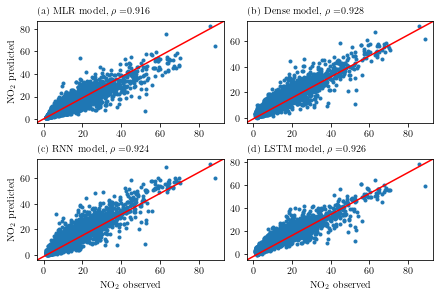

In [25]:
rho_robust = stats.pearsonr(df_rreg_results.iloc[:,0], df_rreg_results.iloc[:,1])
rho_dense = stats.pearsonr(df_dense_results.iloc[:,0], df_dense_results.iloc[:,1])
rho_RNN = stats.pearsonr(df_RNN_results.iloc[:,0], df_RNN_results.iloc[:,1])
rho_LSTM = stats.pearsonr(df_lstm_results.iloc[:,0], df_lstm_results.iloc[:,1])


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, constrained_layout=True, figsize=(6,4))

ax1.scatter(df_rreg_results['NO$_2$ observed'], df_rreg_results['NO$_2$ predicted'], marker='.')
# ax1.set_xlabel('NO$_2$ (actual)')
ax1.set_ylabel('NO$_2$ predicted')
ax1.annotate(r'(a) MLR model, $\rho = $' + str(round(rho_robust[0],3)), xy=(0, 1.07), xycoords="axes fraction")
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax1.transAxes
line.set_transform(transform)
ax1.add_line(line)

ax2.scatter(df_dense_results['NO$_2$ observed'], df_dense_results['NO$_2$ predicted'], marker='.')
# ax2.set_xlabel('NO$_2$ (actual)')
# ax2.set_ylabel('NO$_2$ predicted')
ax2.annotate(r'(b) Dense model, $\rho = $' + str(round(rho_dense[0],3)), xy=(0, 1.07), xycoords="axes fraction")
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax2.transAxes
line.set_transform(transform)
ax2.add_line(line)

ax3.scatter(df_RNN_results['NO$_2$ observed'], df_RNN_results['NO$_2$ predicted'], marker='.')
ax3.set_xlabel('NO$_2$ observed')
ax3.set_ylabel('NO$_2$ predicted')
ax3.annotate(r'(c) RNN model, $\rho = $' + str(round(rho_RNN[0],3)), xy=(0, 1.07), xycoords="axes fraction")
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax3.transAxes
line.set_transform(transform)
ax3.add_line(line)

ax4.scatter(df_lstm_results['NO$_2$ observed'], df_lstm_results['NO$_2$ predicted'], marker='.')
ax4.set_xlabel('NO$_2$ observed')
# ax4.set_ylabel('NO$_2$ predicted')
ax4.annotate(r'(d) LSTM model, $\rho = $' + str(round(rho_LSTM[0],3)), xy=(0, 1.07), xycoords="axes fraction")
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax4.transAxes
line.set_transform(transform)
ax4.add_line(line)

plt.savefig('../plots/correlations.pdf')

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

print('Robust')
print(mean_squared_error(df_rreg_results['NO$_2$ (actual)'], df_rreg_results['NO$_2$ predicted']).round(3))
print(np.sqrt(mean_squared_error(df_rreg_results['NO$_2$ (actual)'], df_rreg_results['NO$_2$ predicted'])).round(3))
print(mean_absolute_percentage_error(df_rreg_results['NO$_2$ (actual)'], df_rreg_results['NO$_2$ predicted']).round(3))

print('\nDense')
print(mean_squared_error(df_dense_results['NO$_2$ (actual)'], df_dense_results['NO$_2$ predicted']).round(3))
print(np.sqrt(mean_squared_error(df_dense_results['NO$_2$ (actual)'], df_dense_results['NO$_2$ predicted'])).round(3))
print(mean_absolute_percentage_error(df_dense_results['NO$_2$ (actual)'], df_dense_results['NO$_2$ predicted']).round(3))

print('\nRNN')
print(mean_squared_error(df_RNN_results['NO$_2$ (actual)'], df_RNN_results['NO$_2$ predicted']).round(3))
print(np.sqrt(mean_squared_error(df_RNN_results['NO$_2$ (actual)'], df_RNN_results['NO$_2$ predicted'])).round(3))
print(mean_absolute_percentage_error(df_RNN_results['NO$_2$ (actual)'], df_RNN_results['NO$_2$ predicted']).round(3))


print('\nLSTM')
print(mean_squared_error(df_lstm_results['NO$_2$ (actual)'], df_lstm_results['NO$_2$ predicted']).round(3))
print(np.sqrt(mean_squared_error(df_lstm_results['NO$_2$ (actual)'], df_lstm_results['NO$_2$ predicted'])).round(3))
print(mean_absolute_percentage_error(df_lstm_results['NO$_2$ (actual)'], df_lstm_results['NO$_2$ predicted']).round(3))

Robust
12.341
3.513
0.2

Dense
10.621
3.259
0.243

RNN
12.174
3.489
0.265

LSTM
11.0
3.317
0.296


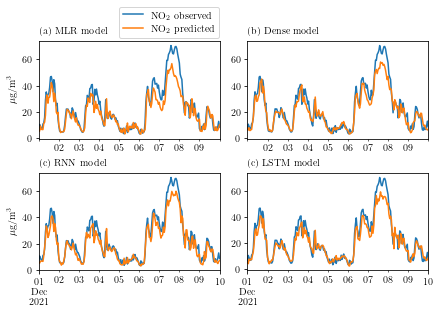

In [28]:
start = '2021-12-01 00:00:00'
end = '2021-12-10 00:00'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, constrained_layout=True, figsize=(6,4.25))

df_rreg_results[start:end].plot(ax=ax1)
ax1.annotate('(a) MLR model', xy=(0, 1.07), xycoords="axes fraction")
ax1.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
ax1.set_xlabel('')
ax1.set_ylabel('$\mu$g/m$^3$')
ax1.set_xticks([], major=True)

df_dense_results[start:end].plot(ax=ax2)
ax2.annotate('(b) Dense model', xy=(0, 1.07), xycoords="axes fraction")
ax2.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
ax2.get_legend().remove()
ax2.set_xlabel('')
ax2.set_xticks([], major=True)

df_RNN_results[start:end].plot(ax=ax3)
ax3.annotate('(c) RNN model', xy=(0, 1.07), xycoords="axes fraction")
#ax2.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
ax3.get_legend().remove()
ax3.set_ylabel('$\mu$g/m$^3$')
ax3.set_xlabel('')

df_lstm_results[start:end].plot(ax=ax4)
ax4.annotate('(c) LSTM model', xy=(0, 1.07), xycoords="axes fraction")
#ax2.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=1, borderaxespad=0.1)
ax4.get_legend().remove()
ax4.set_xlabel('')

plt.savefig('../plots/predictions.pdf')